In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)
from src.lib import vertex_labeling

from src.util import machina_data_extraction_util as mach_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

SANBORN_DATA_DIR = os.path.join(repo_dir, 'src/data/sanborn_melanoma_2015')


In [2]:

def find_labeling(all_mut_trees_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = mach_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    #print(cluster_label_to_idx)
   
    data = mach_util.get_adj_matrices_from_all_mutation_trees(all_mut_trees_fn, cluster_label_to_idx)
    print("num trees:", len(data))
    
    for adj_matrix, pruned_cluster_label_to_idx in data:
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        B = vert_util.get_mutation_matrix_tensor(T)

        idx_to_label = {v:str(v) for k,v in pruned_cluster_label_to_idx.items()}

        print(unique_sites)   
        primary_idx = unique_sites.index('primary')
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T

        vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                    p=r, node_idx_to_label=idx_to_label, 
                                                    w_e=0.1, w_l=0.8, w_m=10, max_iter=150, batch_size=64, 
                                                    custom_colors=custom_colors, primary="primary", show_top_trees=True)


        

num trees: 1
['primary', 'parotid_gland', 'locoregional_1', 'locoregional_2']


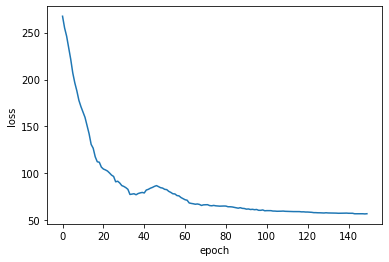

08:37:03 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


all_min_loss_labeled_trees {<src.lib.vertex_labeling.LabeledTree object at 0x7f95811e7fa0>, <src.lib.vertex_labeling.LabeledTree object at 0x7f95811e7c40>, <src.lib.vertex_labeling.LabeledTree object at 0x7f95811e7fd0>}
Migration number: 4.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 9.954
L1: 4.0
Loss: 47.195
Tree 1
U > 0.05

['norm', '0', '1', '2', '3']
                norm     0     1     2     3
primary        0.268 0.000 0.000 0.602 0.088
parotid_gland  0.832 0.000 0.000 0.000 0.000
locoregional_1 0.610 0.158 0.000 0.107 0.097
locoregional_2 0.389 0.000 0.546 0.000 0.000
F_hat
tensor([[0.9582, 0.0000, 0.0000, 0.6024, 0.6899],
        [0.8318, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9721, 0.1580, 0.0000, 0.2650, 0.3618],
        [0.9352, 0.0000, 0.5460, 0.0000, 0.5460]])


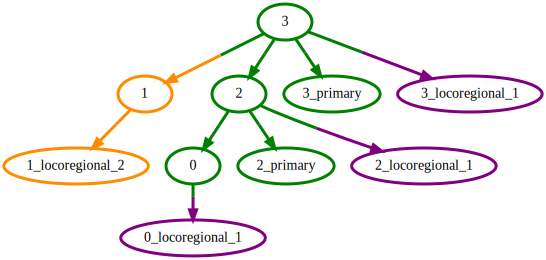

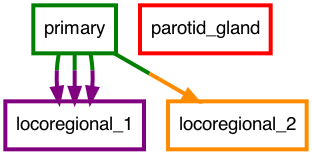

08:37:03 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 5.0
Comigration number: 2.0
Seeding site number: 2.0
Neg log likelihood: 10.56
L1: 3.999999761581421
Loss: 58.256
Tree 2
U > 0.05

['norm', '0', '1', '2', '3']
                norm     0     1     2     3
primary        0.270 0.000 0.000 0.683 0.000
parotid_gland  0.832 0.000 0.000 0.000 0.000
locoregional_1 0.620 0.150 0.000 0.083 0.105
locoregional_2 0.396 0.000 0.510 0.000 0.000
F_hat
tensor([[0.9528, 0.0000, 0.0000, 0.6831, 0.6831],
        [0.8317, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9575, 0.1500, 0.0000, 0.2334, 0.3380],
        [0.9060, 0.0000, 0.5104, 0.0000, 0.5104]])


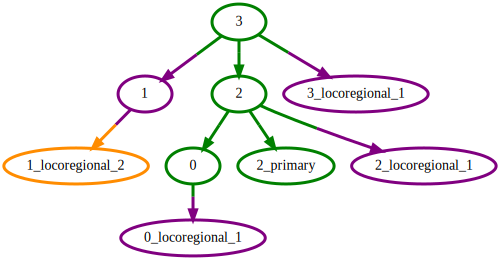

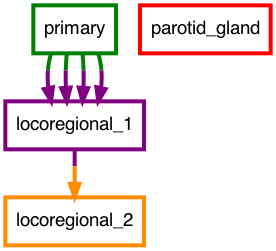

08:37:04 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 5.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 8.286
L1: 4.000000476837158
Loss: 58.029
Tree 3
U > 0.05

['norm', '0', '1', '2', '3']
                norm     0     1     2     3
primary        0.271 0.000 0.000 0.636 0.070
parotid_gland  0.832 0.000 0.072 0.000 0.000
locoregional_1 0.611 0.138 0.000 0.138 0.077
locoregional_2 0.394 0.000 0.532 0.000 0.000
F_hat
tensor([[0.9763, 0.0000, 0.0000, 0.6357, 0.7058],
        [0.9040, 0.0000, 0.0720, 0.0000, 0.0720],
        [0.9634, 0.1385, 0.0000, 0.2762, 0.3529],
        [0.9266, 0.0000, 0.5323, 0.0000, 0.5323]])


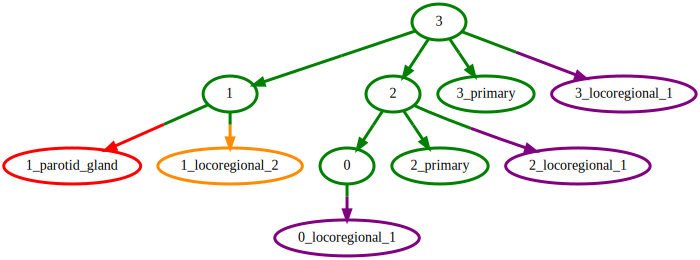

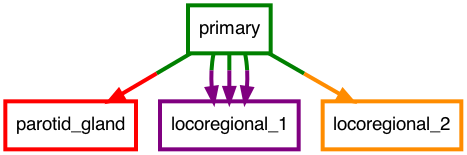

08:37:04 DEBUG

U > 0.05

08:37:04 DEBUG
                norm     0     1     2     3
primary        0.271 0.000 0.000 0.636 0.070
parotid_gland  0.832 0.000 0.072 0.000 0.000
locoregional_1 0.611 0.138 0.000 0.138 0.077
locoregional_2 0.394 0.000 0.532 0.000 0.000
08:37:04 DEBUG

F_hat
08:37:04 DEBUG
tensor([[0.9763, 0.0000, 0.0000, 0.6357, 0.7058],
        [0.9040, 0.0000, 0.0720, 0.0000, 0.0720],
        [0.9634, 0.1385, 0.0000, 0.2762, 0.3529],
        [0.9266, 0.0000, 0.5323, 0.0000, 0.5323]])
08:37:04 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------


Best tree
Migration number: 4.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 3471.304
L1: 3.6972708702087402
Loss: 393.088


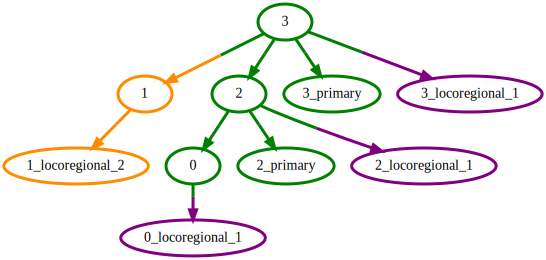

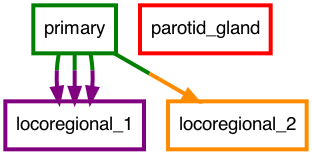

In [11]:
# Patient A
patient = "A"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red',  'purple', 'darkorange',]]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



num trees: 1
['primary', 'locoregional_1', 'locoregional_2']


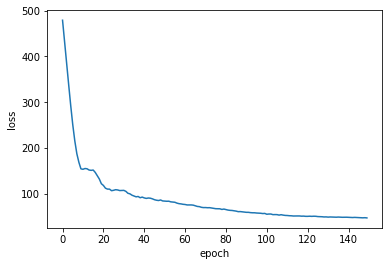

08:40:39 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


all_min_loss_labeled_trees {<src.lib.vertex_labeling.LabeledTree object at 0x7f9540085940>, <src.lib.vertex_labeling.LabeledTree object at 0x7f9581230e80>, <src.lib.vertex_labeling.LabeledTree object at 0x7f95600b42e0>}
Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 12.443
L1: 3.000000238418579
Loss: 26.644
Tree 1
U > 0.05

['norm', '0', '1', '2', '3', '4']
                norm     0     1     2     3     4
primary        0.536 0.000 0.056 0.274 0.000 0.083
locoregional_1 0.197 0.000 0.778 0.000 0.000 0.000
locoregional_2 0.528 0.322 0.000 0.000 0.000 0.000
F_hat
tensor([[0.9487, 0.0000, 0.0561, 0.2738, 0.0000, 0.4127],
        [0.9749, 0.0000, 0.7780, 0.0000, 0.0000, 0.7780],
        [0.8499, 0.3219, 0.0000, 0.0000, 0.3219, 0.3219]])


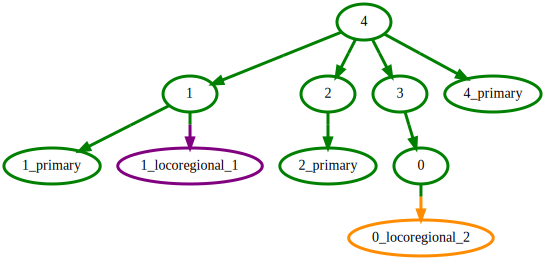

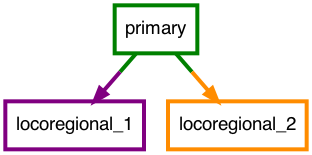

08:40:40 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 11.884
L1: 3.0
Loss: 26.588
Tree 2
U > 0.05

['norm', '0', '1', '2', '3', '4']
                norm     0     1     2     3     4
primary        0.536 0.000 0.000 0.271 0.000 0.092
locoregional_1 0.197 0.000 0.769 0.000 0.000 0.000
locoregional_2 0.528 0.318 0.000 0.000 0.000 0.000
F_hat
tensor([[0.8990, 0.0000, 0.0000, 0.2714, 0.0000, 0.3630],
        [0.9653, 0.0000, 0.7686, 0.0000, 0.0000, 0.7686],
        [0.8458, 0.3182, 0.0000, 0.0000, 0.3182, 0.3182]])


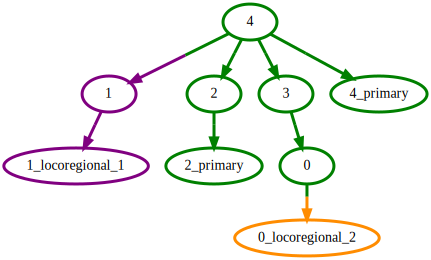

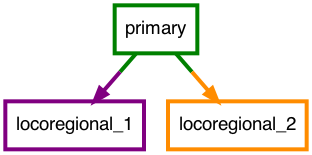

08:40:41 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 12.953
L1: 3.000000238418579
Loss: 26.695
Tree 3
U > 0.05

['norm', '0', '1', '2', '3', '4']
                norm     0     1     2     3     4
primary        0.536 0.000 0.055 0.277 0.000 0.073
locoregional_1 0.197 0.000 0.777 0.000 0.000 0.000
locoregional_2 0.528 0.332 0.000 0.000 0.000 0.000
F_hat
tensor([[0.9410, 0.0000, 0.0547, 0.2775, 0.0000, 0.4047],
        [0.9737, 0.0000, 0.7768, 0.0000, 0.0000, 0.7768],
        [0.8599, 0.3320, 0.0000, 0.0000, 0.3320, 0.3320]])


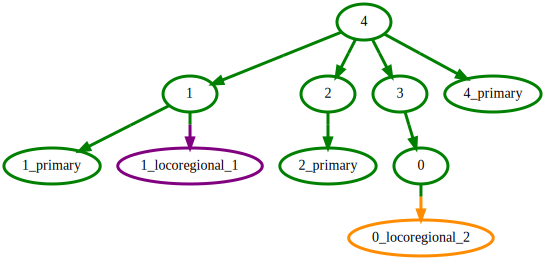

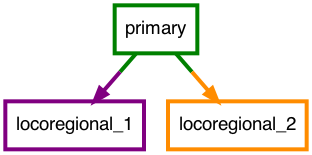

08:40:41 DEBUG

U > 0.05

08:40:41 DEBUG
                norm     0     1     2     3     4
primary        0.536 0.000 0.055 0.277 0.000 0.073
locoregional_1 0.197 0.000 0.777 0.000 0.000 0.000
locoregional_2 0.528 0.332 0.000 0.000 0.000 0.000
08:40:41 DEBUG

F_hat
08:40:41 DEBUG
tensor([[0.9410, 0.0000, 0.0547, 0.2775, 0.0000, 0.4047],
        [0.9737, 0.0000, 0.7768, 0.0000, 0.0000, 0.7768],
        [0.8599, 0.3320, 0.0000, 0.0000, 0.3320, 0.3320]])
08:40:41 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------


Best tree
Migration number: 2.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 670.113
L1: 2.710029363632202
Loss: 92.179


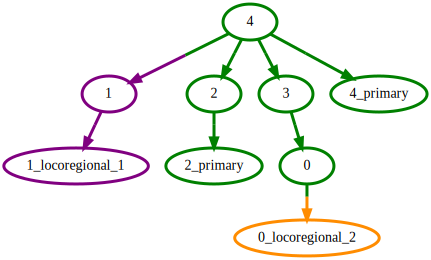

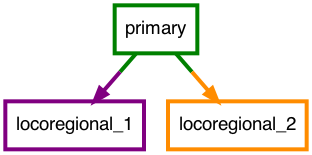

In [12]:
# Patient C
patient = "C"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'purple', 'darkorange']]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



num trees: 1
['primary', 'lymph_node', 'locoregional_1', 'locoregional_2']


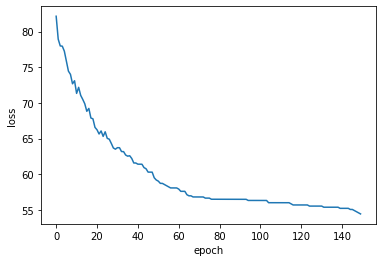

08:41:00 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


all_min_loss_labeled_trees {<src.lib.vertex_labeling.LabeledTree object at 0x7f9571e149d0>, <src.lib.vertex_labeling.LabeledTree object at 0x7f9571e14af0>, <src.lib.vertex_labeling.LabeledTree object at 0x7f9571e149a0>}
Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.383
L1: 4.0
Loss: 47.538
Tree 1
U > 0.05

['norm', '0', '1']
                norm     0     1
primary        0.519 0.000 0.470
lymph_node     0.416 0.569 0.000
locoregional_1 0.222 0.628 0.150
locoregional_2 0.140 0.830 0.000
F_hat
tensor([[0.9887, 0.0000, 0.4700],
        [0.9855, 0.5695, 0.5695],
        [1.0000, 0.6279, 0.7782],
        [0.9706, 0.8304, 0.8304]])


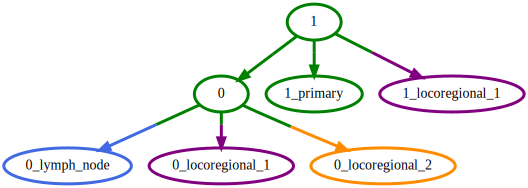

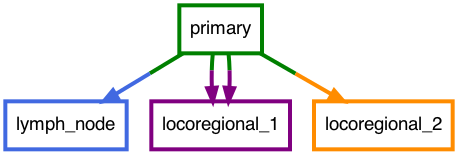

08:41:00 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.392
L1: 4.0
Loss: 47.539
Tree 2
U > 0.05

['norm', '0', '1']
                norm     0     1
primary        0.519 0.000 0.464
lymph_node     0.416 0.578 0.000
locoregional_1 0.222 0.628 0.150
locoregional_2 0.140 0.821 0.000
F_hat
tensor([[0.9828, 0.0000, 0.4641],
        [0.9939, 0.5775, 0.5775],
        [1.0000, 0.6279, 0.7782],
        [0.9606, 0.8207, 0.8207]])


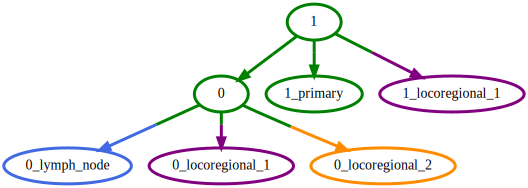

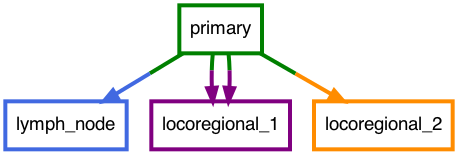

08:41:01 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.385
L1: 3.999999761581421
Loss: 47.538
Tree 3
U > 0.05

['norm', '0', '1']
                norm     0     1
primary        0.519 0.000 0.468
lymph_node     0.416 0.573 0.000
locoregional_1 0.222 0.626 0.152
locoregional_2 0.140 0.815 0.000
F_hat
tensor([[0.9870, 0.0000, 0.4681],
        [0.9890, 0.5729, 0.5729],
        [1.0000, 0.6264, 0.7782],
        [0.9548, 0.8151, 0.8151]])


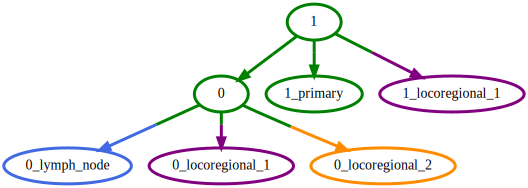

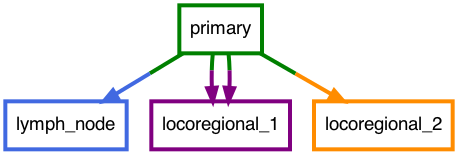

08:41:01 DEBUG

U > 0.05

08:41:01 DEBUG
                norm     0     1
primary        0.519 0.000 0.468
lymph_node     0.416 0.573 0.000
locoregional_1 0.222 0.626 0.152
locoregional_2 0.140 0.815 0.000
08:41:01 DEBUG

F_hat
08:41:01 DEBUG
tensor([[0.9870, 0.0000, 0.4681],
        [0.9890, 0.5729, 0.5729],
        [1.0000, 0.6264, 0.7782],
        [0.9548, 0.8151, 0.8151]])
08:41:01 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------


Best tree
Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.519
L1: 3.9448046684265137
Loss: 47.508


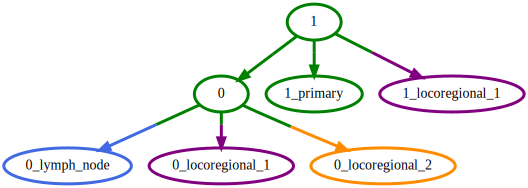

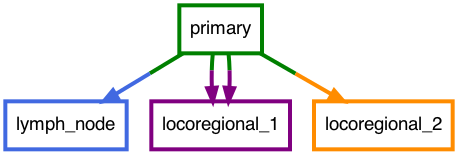

In [13]:
# Patient D
patient = "D"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'royalblue', 'purple', 'darkorange', ]]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)


num trees: 1
['primary', 'locoregional_1', 'locoregional_2', 'lymph_node', 'locoregional_3']


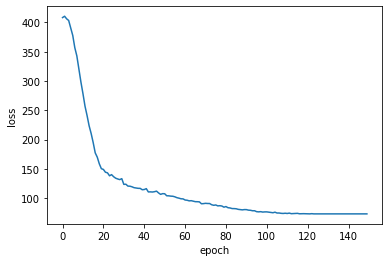

08:42:52 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


all_min_loss_labeled_trees {<src.lib.vertex_labeling.LabeledTree object at 0x7f9571c9bcd0>, <src.lib.vertex_labeling.LabeledTree object at 0x7f9571c9beb0>, <src.lib.vertex_labeling.LabeledTree object at 0x7f9571c9be80>}
Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.391
L1: 5.000000476837158
Loss: 69.239
Tree 1
U > 0.05

['norm', '0', '1', '2', '3', '4', '5', '6', '7']
                norm     0     1     2     3     4     5     6     7
primary        0.233 0.000 0.000 0.000 0.000 0.000 0.529 0.215 0.000
locoregional_1 0.110 0.000 0.000 0.000 0.000 0.807 0.000 0.000 0.000
locoregional_2 0.139 0.000 0.312 0.514 0.000 0.000 0.000 0.000 0.000
lymph_node     0.131 0.000 0.000 0.000 0.572 0.278 0.000 0.000 0.000
locoregional_3 0.125 0.866 0.000 0.000 0.000 0.000 0.000 0.000 0.000
F_hat
tensor([[0.9775, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5292, 0.7442, 0.0000],
        [0.9172, 0.0000, 0.0000, 0.0000, 0.0000, 0.8074, 0.0000, 0.8074, 0.8074]

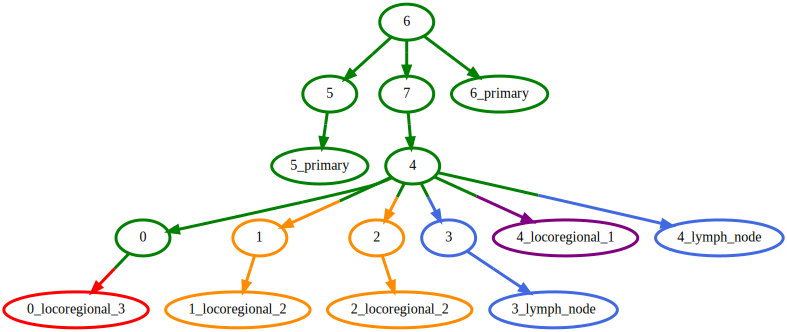

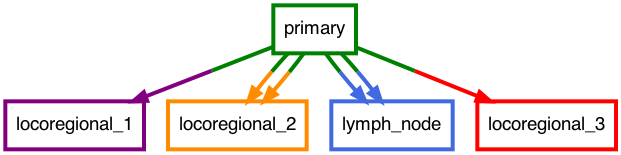

08:42:53 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.39
L1: 5.000000476837158
Loss: 69.239
Tree 2
U > 0.05

['norm', '0', '1', '2', '3', '4', '5', '6', '7']
                norm     0     1     2     3     4     5     6     7
primary        0.233 0.000 0.000 0.000 0.000 0.000 0.529 0.216 0.000
locoregional_1 0.109 0.000 0.000 0.000 0.000 0.812 0.000 0.000 0.000
locoregional_2 0.139 0.000 0.313 0.519 0.000 0.000 0.000 0.000 0.000
lymph_node     0.131 0.000 0.000 0.000 0.572 0.279 0.000 0.000 0.000
locoregional_3 0.125 0.866 0.000 0.000 0.000 0.000 0.000 0.000 0.000
F_hat
tensor([[0.9781, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5292, 0.7448, 0.0000],
        [0.9219, 0.0000, 0.0000, 0.0000, 0.0000, 0.8125, 0.0000, 0.8125, 0.8125],
        [0.9714, 0.0000, 0.3128, 0.5191, 0.0000, 0.8319, 0.0000, 0.8319, 0.8319],
        [0.9812, 0.0000, 0.0000, 0.

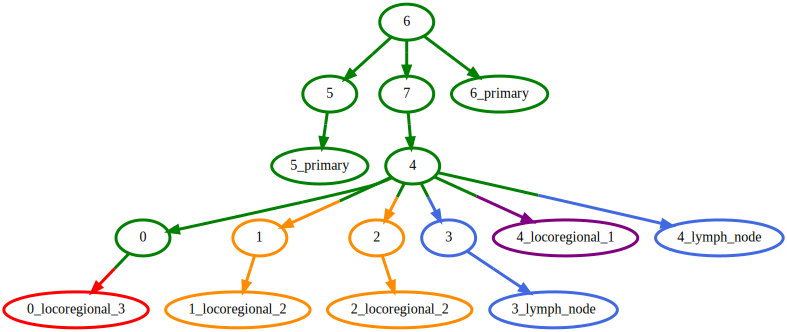

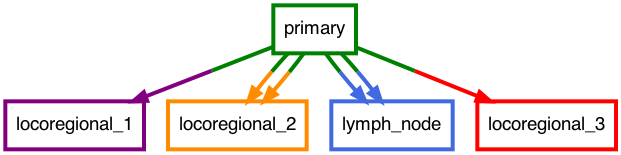

08:42:53 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.387
L1: 5.0
Loss: 69.239
Tree 3
U > 0.05

['norm', '0', '1', '2', '3', '4', '5', '6', '7']
                norm     0     1     2     3     4     5     6     7
primary        0.233 0.000 0.000 0.000 0.000 0.000 0.529 0.214 0.000
locoregional_1 0.110 0.000 0.000 0.000 0.000 0.815 0.000 0.000 0.000
locoregional_2 0.139 0.000 0.314 0.524 0.000 0.000 0.000 0.000 0.000
lymph_node     0.131 0.000 0.000 0.000 0.572 0.276 0.000 0.000 0.000
locoregional_3 0.124 0.864 0.000 0.000 0.000 0.000 0.000 0.000 0.000
F_hat
tensor([[0.9761, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5288, 0.7430, 0.0000],
        [0.9250, 0.0000, 0.0000, 0.0000, 0.0000, 0.8152, 0.0000, 0.8152, 0.8152],
        [0.9773, 0.0000, 0.3136, 0.5242, 0.0000, 0.8378, 0.0000, 0.8378, 0.8378],
        [0.9786, 0.0000, 0.0000, 0.0000, 0.5719,

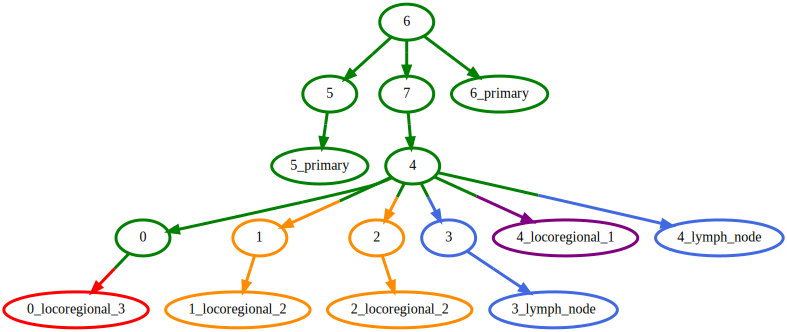

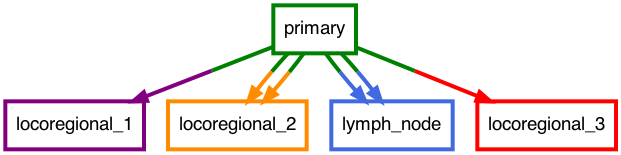

08:42:54 DEBUG

U > 0.05

08:42:54 DEBUG
                norm     0     1     2     3     4     5     6     7
primary        0.233 0.000 0.000 0.000 0.000 0.000 0.529 0.214 0.000
locoregional_1 0.110 0.000 0.000 0.000 0.000 0.815 0.000 0.000 0.000
locoregional_2 0.139 0.000 0.314 0.524 0.000 0.000 0.000 0.000 0.000
lymph_node     0.131 0.000 0.000 0.000 0.572 0.276 0.000 0.000 0.000
locoregional_3 0.124 0.864 0.000 0.000 0.000 0.000 0.000 0.000 0.000
08:42:54 DEBUG

F_hat
08:42:54 DEBUG
tensor([[0.9761, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5288, 0.7430, 0.0000],
        [0.9250, 0.0000, 0.0000, 0.0000, 0.0000, 0.8152, 0.0000, 0.8152, 0.8152],
        [0.9773, 0.0000, 0.3136, 0.5242, 0.0000, 0.8378, 0.0000, 0.8378, 0.8378],
        [0.9786, 0.0000, 0.0000, 0.0000, 0.5719, 0.8480, 0.0000, 0.8480, 0.8480],
        [0.9884, 0.8642, 0.0000, 0.0000, 0.0000, 0.8642, 0.0000, 0.8642, 0.8642]])
08:42:54 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------


Best tree
Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 12.156
L1: 4.845369815826416
Loss: 70.092


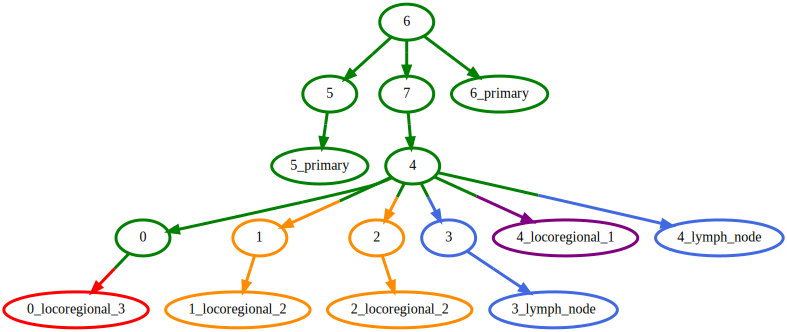

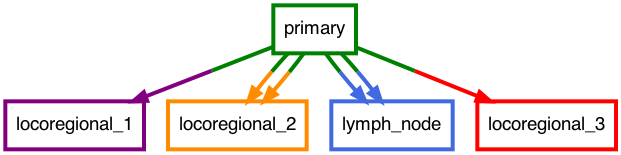

In [16]:
# Patient E
patient = "E"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'purple', 'darkorange', 'royalblue', 'red', ]]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

num trees: 1
['primary', 'lymph_node', 'locoregional', 'distant']


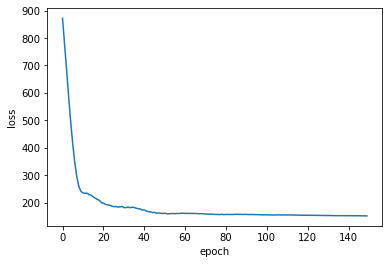

08:41:44 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


all_min_loss_labeled_trees {<src.lib.vertex_labeling.LabeledTree object at 0x7f958117c040>, <src.lib.vertex_labeling.LabeledTree object at 0x7f958117c190>, <src.lib.vertex_labeling.LabeledTree object at 0x7f958117ce80>}
Migration number: 12.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 18.054
L1: 4.0
Loss: 129.005
Tree 1
U > 0.05

['norm', '0', '1', '2', '3', '4']
              norm     0     1     2     3     4
primary      0.373 0.087 0.103 0.081 0.195 0.162
lymph_node   0.478 0.113 0.053 0.123 0.102 0.132
locoregional 0.641 0.109 0.066 0.088 0.000 0.000
distant      0.479 0.000 0.142 0.134 0.110 0.094
F_hat
tensor([[1.0000, 0.0868, 0.1028, 0.1842, 0.1945, 0.6270],
        [1.0000, 0.1126, 0.0534, 0.1759, 0.1017, 0.5223],
        [0.9032, 0.1087, 0.0660, 0.1537, 0.0000, 0.2624],
        [0.9582, 0.0000, 0.1417, 0.2754, 0.1104, 0.4795]])


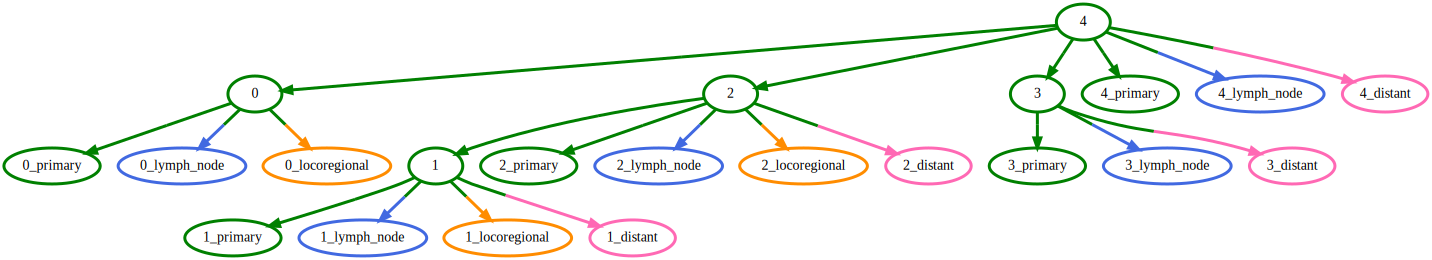

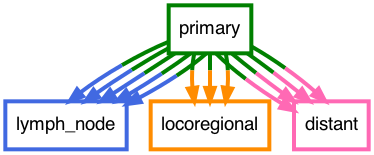

08:41:45 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 16.071
L1: 3.999999523162842
Loss: 138.807
Tree 2
U > 0.05

['norm', '0', '1', '2', '3', '4']
              norm     0     1     2     3     4
primary      0.373 0.127 0.073 0.135 0.160 0.132
lymph_node   0.478 0.068 0.062 0.142 0.133 0.118
locoregional 0.641 0.123 0.000 0.000 0.078 0.071
distant      0.479 0.060 0.198 0.130 0.064 0.070
F_hat
tensor([[1.0000, 0.1271, 0.0732, 0.2080, 0.1601, 0.6272],
        [1.0000, 0.0679, 0.0620, 0.2038, 0.1326, 0.5221],
        [0.9125, 0.1234, 0.0000, 0.0000, 0.0777, 0.2719],
        [1.0000, 0.0598, 0.1980, 0.3278, 0.0636, 0.5211]])


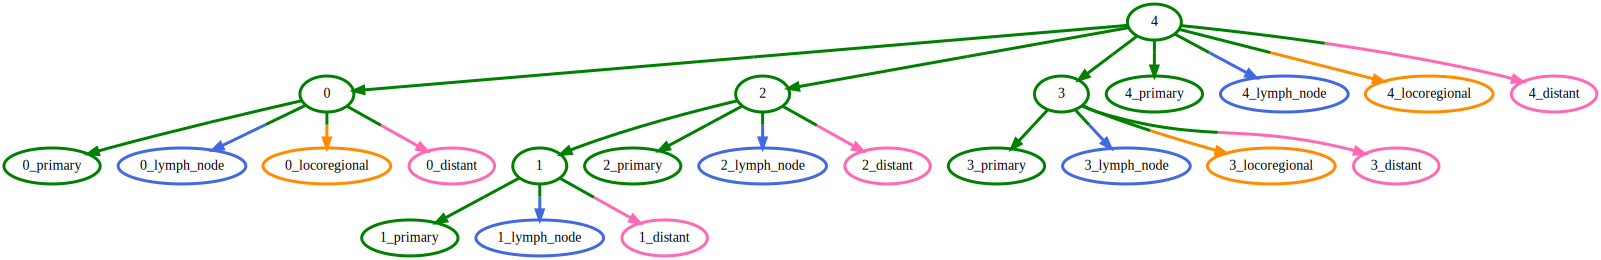

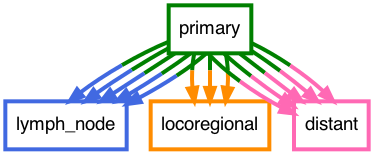

08:41:45 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------

Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 16.506
L1: 3.999999523162842
Loss: 138.851
Tree 3
U > 0.05

['norm', '0', '1', '2', '3', '4']
              norm     0     1     2     3     4
primary      0.373 0.119 0.057 0.095 0.204 0.153
lymph_node   0.478 0.072 0.084 0.192 0.088 0.087
locoregional 0.641 0.091 0.000 0.080 0.078 0.068
distant      0.479 0.000 0.176 0.083 0.110 0.109
F_hat
tensor([[1.0000, 0.1185, 0.0574, 0.1522, 0.2040, 0.6273],
        [1.0000, 0.0716, 0.0835, 0.2757, 0.0876, 0.5222],
        [0.9572, 0.0911, 0.0000, 0.0802, 0.0776, 0.3166],
        [0.9569, 0.0000, 0.1763, 0.2590, 0.1097, 0.4778]])


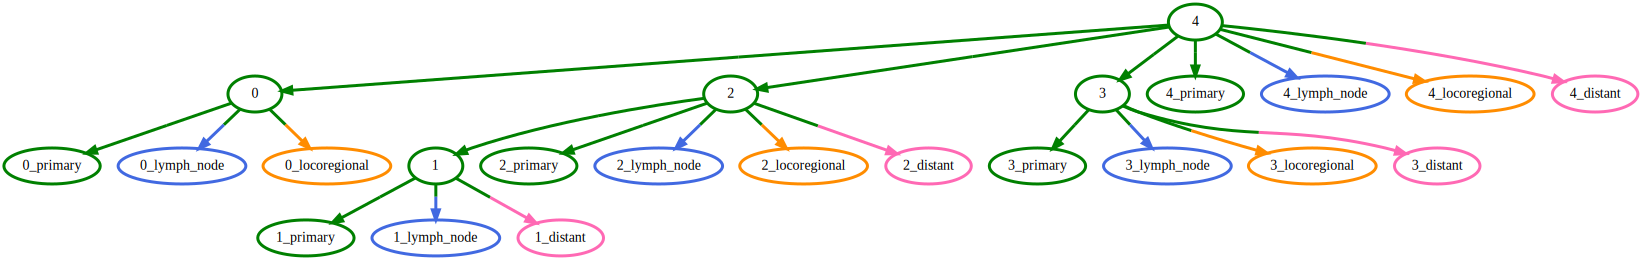

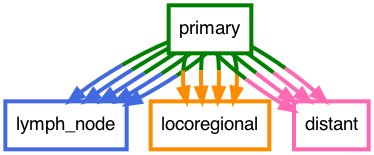

08:41:46 DEBUG

U > 0.05

08:41:46 DEBUG
              norm     0     1     2     3     4
primary      0.373 0.119 0.057 0.095 0.204 0.153
lymph_node   0.478 0.072 0.084 0.192 0.088 0.087
locoregional 0.641 0.091 0.000 0.080 0.078 0.068
distant      0.479 0.000 0.176 0.083 0.110 0.109
08:41:46 DEBUG

F_hat
08:41:46 DEBUG
tensor([[1.0000, 0.1185, 0.0574, 0.1522, 0.2040, 0.6273],
        [1.0000, 0.0716, 0.0835, 0.2757, 0.0876, 0.5222],
        [0.9572, 0.0911, 0.0000, 0.0802, 0.0776, 0.3166],
        [0.9569, 0.0000, 0.1763, 0.2590, 0.1097, 0.4778]])
08:41:46 DEBUG
run [PosixPath('dot'), '-Kdot', '-Tsvg']


----------------------------------------------------------------------------------------------------


Best tree
Migration number: 12.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 264.72
L1: 3.8614001274108887
Loss: 153.561


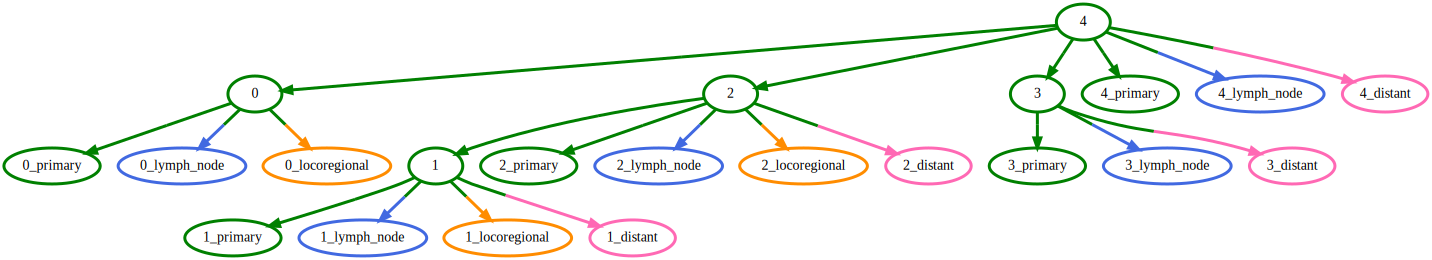

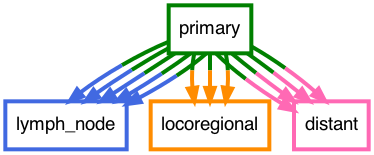

In [15]:
# Patient F
patient = "F"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'royalblue', 'darkorange', 'hotpink']]
find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

